In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp

In [2]:
auctions = pd.read_csv('../data/auctions.csv.gzip',compression='gzip', dtype='object')
auctions.describe()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
count,0.0,19571319,19571319,19571319,19571319,19571319,19571319
unique,0.0,1,19570963,206977,2,2,5
top,NaN,6333597102633388268,2019-03-11 00:11:12.183865,633139769114048761,1,1,0
freq,NaN,19571319,2,27762,15541825,15541825,13354597


Se puede ver que **auction_type_id** es siempre nulo y que **country** tiene siempre el mismo valor.

In [3]:
auctions.shape

(19571319, 7)

In [4]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 7 columns):
auction_type_id    object
country            object
date               object
device_id          object
platform           object
ref_type_id        object
source_id          object
dtypes: object(7)
memory usage: 1.0+ GB


In [5]:
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [6]:
auctions['date'] = pd.to_datetime(auctions['date'])

----
# Analisis Exploratorio de cada columna

Hay uno solo por lo que la columna puede eliminarse

## ¿Cual es el periodo cubierto por las fechas?

In [7]:
print("Fecha Min.: ", auctions['date'].min())
print("Fecha Max.: ", auctions['date'].max())

('Fecha Min.: ', Timestamp('2019-03-05 00:52:33.352526'))
('Fecha Max.: ', Timestamp('2019-03-13 23:59:59.997032'))


## Como se distribuyen las fechas

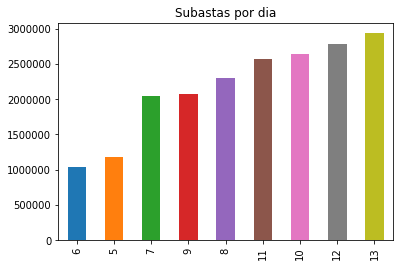

In [18]:
auctions['date'].dt.day.value_counts().sort_values().plot.bar(title="Subastas por dia")

## ¿Cuantos dispositivos diferentes hay? 

In [9]:
len(auctions['device_id'].unique())

206977

## ¿Cuantas entradas tiene cada dispositivo? 

In [10]:
print('Min. de entradas de un dispositivo: ', auctions['device_id'].value_counts().min())
print('Max. de entradas de un dispositivo: ', auctions['device_id'].value_counts().max())
print('Mean. de entradas de un dispositivo: ', auctions['device_id'].value_counts().mean())

('Min. de entradas de un dispositivo: ', 1)
('Max. de entradas de un dispositivo: ', 27762)
('Mean. de entradas de un dispositivo: ', 94.55794122052208)


## ¿Cuantas plataformas hay?

In [11]:
len(auctions['platform'].unique())

2

In [12]:
auctions['platform'].value_counts()

1    15541825
2     4029494
Name: platform, dtype: int64

## Que valores contiene ref_type_id?

In [13]:
auctions['ref_type_id'].value_counts()

1    15541825
7     4029494
Name: ref_type_id, dtype: int64

## Que valores tiene source_id?  

In [14]:
auctions['source_id'].value_counts()

0    13354597
1     4016739
5     1466494
2      582083
6      151406
Name: source_id, dtype: int64

### Resumen: 

* auction_type_id: No tiene valores
* country: Tiene siempre el mismo valor
* date: es un datetime
* device id tiene 206K de valores distintos, de los cuales el promedio de aparicion es 95 veces.
* platform, ref_type_id y source_id son variables categoricas.

Mejor read_csv (ahorra un 60% de espacio)
```python
auctions = pd.read_csv('../data/auctions.csv.gzip',compression='gzip',\
                        usecols=['date','device_id','platform','ref_type_id','source_id'],\
                        dtype={'device_id':'int64','platform':'category','ref_type_id':'category','source_id':'category'},\
                        parse_dates=['date'])
```
